# Ontario Historical and Live Energy Generations Pricing
## Based on IESO data
Need to get a sense of the historical Energy pricing data and figure out methods of controlling energy arbitrage based on live data. Also can produce simulations based on historical data.

Start with the IESO Hourly Pricing data: https://www.ieso.ca/Power-Data/Data-Directory

Plotting 2024 current data

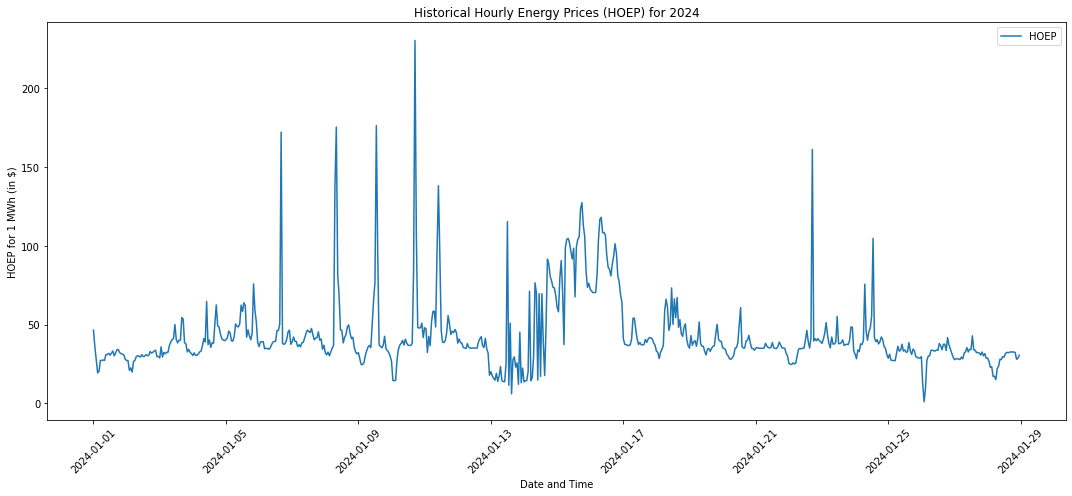

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the uploaded Excel file
file_path = './PUB_PriceHOEPPredispOR.csv'
data = pd.read_csv(file_path)

# Removing initial header rows and setting correct column names
data_cleaned = data.iloc[2:]
data_cleaned.columns = ['Date', 'Hour', 'HOEP', 'Hour 1 Predispatch', 'Hour 2 Predispatch', 'Hour 3 Predispatch', 'OR 10 Min Sync', 'OR 10 Min non-sync', 'OR 30 Min']

# Dropping unnecessary columns and resetting the index
data_cleaned = data_cleaned[['Date', 'Hour', 'HOEP']].reset_index(drop=True)

# Removing the additional header row
data_cleaned = data_cleaned[data_cleaned['Hour'] != 'Hour']

# Converting 'Hour' to integer and 'HOEP' to numeric
data_cleaned['Hour'] = data_cleaned['Hour'].astype(int) - 1  # Adjusting hour to be 0-23 format
data_cleaned['Datetime'] = pd.to_datetime(data_cleaned['Date']) + pd.to_timedelta(data_cleaned['Hour'], unit='h')
data_cleaned['HOEP'] = pd.to_numeric(data_cleaned['HOEP'], errors='coerce')

# Filter out rows with missing 'HOEP' values
data_cleaned = data_cleaned.dropna(subset=['HOEP'])

# Plotting the entire 2024 data
plt.figure(figsize=(15, 7))
plt.plot(data_cleaned['Datetime'], data_cleaned['HOEP'], label='HOEP')
plt.title('Historical Hourly Energy Prices (HOEP) for 2024')
plt.xlabel('Date and Time')
plt.ylabel('HOEP for 1 MWh (in $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


Plotting 2023 Data

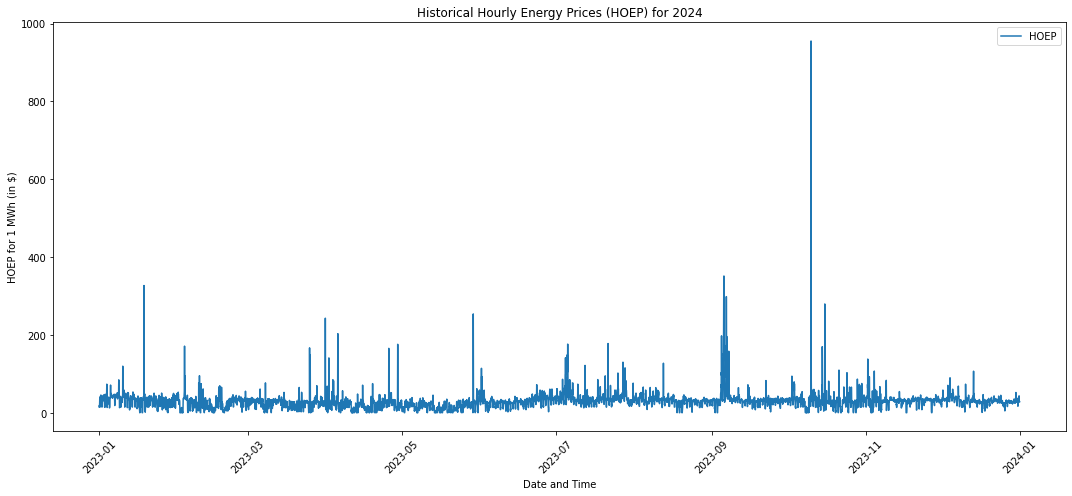

In [2]:
# Load the data from the uploaded Excel file
file_path = './PUB_PriceHOEPPredispOR_2023_v393.csv'
data = pd.read_csv(file_path)

# Removing initial header rows and setting correct column names
data_cleaned = data.iloc[2:]
data_cleaned.columns = ['Date', 'Hour', 'HOEP', 'Hour 1 Predispatch', 'Hour 2 Predispatch', 'Hour 3 Predispatch', 'OR 10 Min Sync', 'OR 10 Min non-sync', 'OR 30 Min']

# Dropping unnecessary columns and resetting the index
data_cleaned = data_cleaned[['Date', 'Hour', 'HOEP']].reset_index(drop=True)

# Removing the additional header row
data_cleaned = data_cleaned[data_cleaned['Hour'] != 'Hour']

# Converting 'Hour' to integer and 'HOEP' to numeric
data_cleaned['Hour'] = data_cleaned['Hour'].astype(int) - 1  # Adjusting hour to be 0-23 format
data_cleaned['Datetime'] = pd.to_datetime(data_cleaned['Date']) + pd.to_timedelta(data_cleaned['Hour'], unit='h')
data_cleaned['HOEP'] = pd.to_numeric(data_cleaned['HOEP'], errors='coerce')

# Filter out rows with missing 'HOEP' values
data_cleaned = data_cleaned.dropna(subset=['HOEP'])

# Plotting the entire 2024 data
plt.figure(figsize=(15, 7))
plt.plot(data_cleaned['Datetime'], data_cleaned['HOEP'], label='HOEP')
plt.title('Historical Hourly Energy Prices (HOEP) for 2024')
plt.xlabel('Date and Time')
plt.ylabel('HOEP for 1 MWh (in $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


Lets take 2021-2023 data together to build a relational model for simulation. 

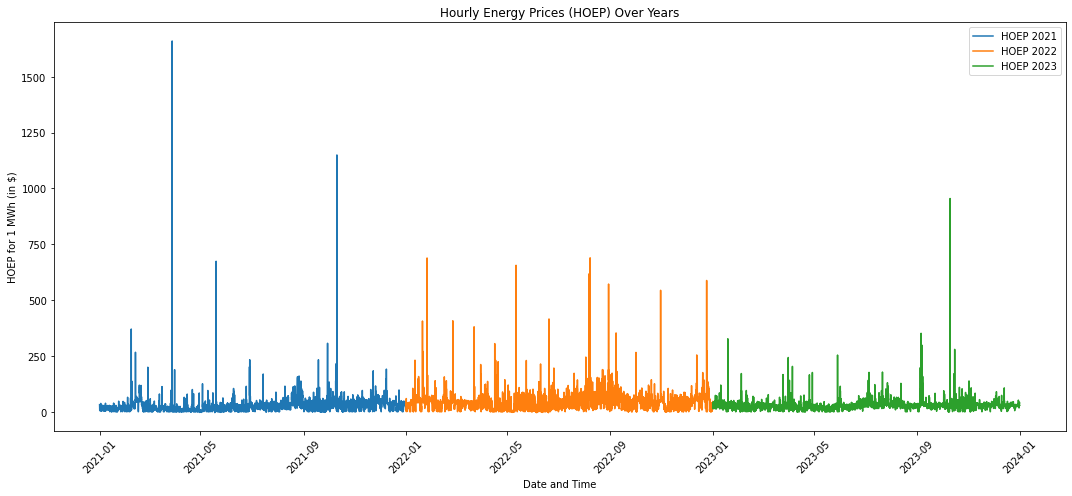

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File paths for each year's CSV data
file_paths = {
    '2021': './PUB_PriceHOEPPredispOR_2021_v395.csv',
    '2022': './PUB_PriceHOEPPredispOR_2022_v396.csv',
    '2023': './PUB_PriceHOEPPredispOR_2023_v393.csv'
}

# Initialize a figure for plotting
plt.figure(figsize=(15, 7))

# Loop through each file path and plot the data
for year, file_path in file_paths.items():
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Clean and prepare the data
    data = data.iloc[2:]  # Skip the first two rows of header information
    data.columns = ['Date', 'Hour', 'HOEP', 'Hour 1 Predispatch', 'Hour 2 Predispatch', 'Hour 3 Predispatch', 'OR 10 Min Sync', 'OR 10 Min non-sync', 'OR 30 Min']
    data = data[['Date', 'Hour', 'HOEP']].reset_index(drop=True)
    data = data[data['Hour'].str.isnumeric()]  # Filter out non-numeric rows
    data['Hour'] = data['Hour'].astype(int) - 1  # Adjust hour to 0-23 format
    data['Datetime'] = pd.to_datetime(data['Date']) + pd.to_timedelta(data['Hour'], unit='h')
    data['HOEP'] = pd.to_numeric(data['HOEP'], errors='coerce')
    data.dropna(subset=['HOEP'], inplace=True)

    # Plot the data
    plt.plot(data['Datetime'], data['HOEP'], label=f'HOEP {year}')

# Add title, labels, and legend
plt.title('Hourly Energy Prices (HOEP) Over Years')
plt.xlabel('Date and Time')
plt.ylabel('HOEP for 1 MWh (in $)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Need to get a sense for the average daily flucation in pricing.


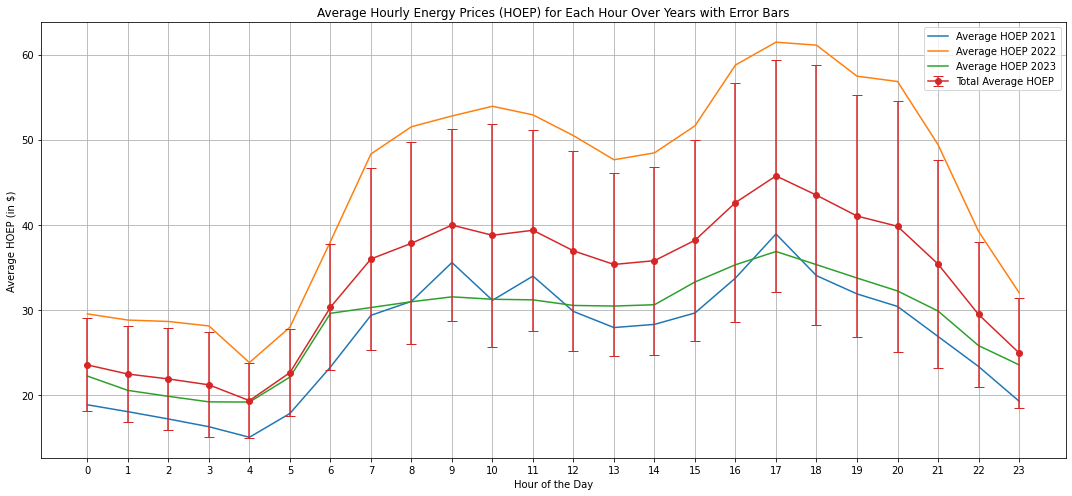

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths
file_paths = {
    '2021': './PUB_PriceHOEPPredispOR_2021_v395.csv',
    '2022': './PUB_PriceHOEPPredispOR_2022_v396.csv',
    '2023': './PUB_PriceHOEPPredispOR_2023_v393.csv'
}

# Initialize a list to hold dataframes of hourly averages for each year
hourly_avg_all_years = []

# Initialize a figure for plotting
plt.figure(figsize=(15, 7))

# Process each file
for year, file_path in file_paths.items():
    # Load the data
    data = pd.read_csv(file_path, skiprows=2)

    # Rename columns for consistency and clarity
    data.columns = ['Date', 'Hour', 'HOEP', 'Hour 1 Predispatch', 'Hour 2 Predispatch', 'Hour 3 Predispatch', 'OR 10 Min Sync', 'OR 10 Min non-sync', 'OR 30 Min']
    data = data[['Date', 'Hour', 'HOEP']]

    # Remove any non-numeric rows from 'Hour' column to prevent errors during type conversion
    data = data[data['Hour'].apply(lambda x: x.isnumeric())]
    
    # Convert the 'Hour' to an integer type
    data['Hour'] = data['Hour'].astype(int) - 1  # Adjusting for 0-23 hour format

    # Convert 'Date' to datetime and 'HOEP' to numeric values
    data['HOEP'] = pd.to_numeric(data['HOEP'], errors='coerce')

    # Drop rows with any null/NaN values in 'HOEP'
    data = data.dropna(subset=['HOEP'])

    # Group by 'Hour' and calculate the average 'HOEP' for each hour
    hourly_avg = data.groupby('Hour')['HOEP'].mean().reset_index()
    
    # Append the yearly average to the list
    hourly_avg_all_years.append(hourly_avg.set_index('Hour'))
    
    # Plot the average hourly prices for each year
    plt.plot(hourly_avg['Hour'], hourly_avg['HOEP'], label=f'Average HOEP {year}')

# Concatenate the list of DataFrames into one DataFrame for combined statistics
combined_hourly_avg = pd.concat(hourly_avg_all_years, axis=1)
# Calculate the mean and standard deviation across the years for each hour
combined_hourly_mean = combined_hourly_avg.mean(axis=1)
combined_hourly_std = combined_hourly_avg.std(axis=1)

# Plot the mean values with error bars
plt.errorbar(combined_hourly_mean.index, combined_hourly_mean, yerr=combined_hourly_std, label='Total Average HOEP', fmt='-o', capsize=5)

# Add title, labels, and legend to the plot
plt.title('Average Hourly Energy Prices (HOEP) for Each Hour Over Years with Error Bars')
plt.xlabel('Hour of the Day')
plt.ylabel('Average HOEP (in $)')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))  # Set x-ticks to show every hour of the day
plt.tight_layout()

# Show the plot
plt.show()


Energy arbitrage optimal to 4MWh storage:
Assumptions:

The battery system has a fixed capacity (e.g., 100 MWh) and starts each simulation fully charged.
The battery has a fixed charge and discharge rate (e.g., 10 MW/h).
The battery has perfect efficiency (no energy loss during charge/discharge, though in reality this is not the case).
The algorithm will not consider grid constraints or additional costs such as wear and tear.
Energy can be bought at any hour's HOEP and sold at any hour's HOEP.
There are no transaction costs for buying or selling energy.
The decision to charge or discharge is based solely on the current hour's price compared to the next hour's predicted price.
The prediction for the next hour's price is the simple average of the past 24 hours' prices.
Algorithm:

Charge: If the current price is lower than the predicted price for the next hour, and the battery is not fully charged, buy and store energy.
Discharge (Sell): If the current price is higher than the predicted price for the next hour, and the battery has stored energy, sell energy.
Hold: If the current price is equal to the predicted price, do nothing.

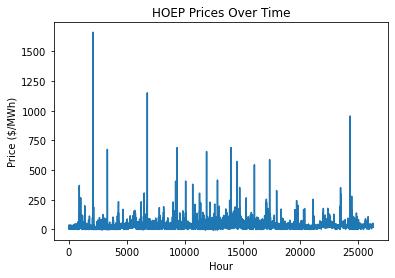

Total profit from energy arbitrage over the simulation period: $1790648.90


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
battery_capacity = 100  # MWh
battery_charge_rate = 10  # MW/h, also discharge rate
battery_state = battery_capacity  # Battery starts fully charged


# Combine all years of data into a single DataFrame
all_data = pd.DataFrame()
for file_path in file_paths.values():
    yearly_data = pd.read_csv(file_path, skiprows=2)
    yearly_data.columns = ['Date', 'Hour', 'HOEP', 'Hour 1 Predispatch', 'Hour 2 Predispatch', 'Hour 3 Predispatch', 'OR 10 Min Sync', 'OR 10 Min non-sync', 'OR 30 Min']
    yearly_data = yearly_data[['Date', 'Hour', 'HOEP']]
    yearly_data = yearly_data[yearly_data['Hour'].apply(lambda x: x.isnumeric())]
    yearly_data['HOEP'] = pd.to_numeric(yearly_data['HOEP'], errors='coerce')
    all_data = pd.concat([all_data, yearly_data])

# Clean the data and reset index
all_data.reset_index(drop=True, inplace=True)
all_data.dropna(subset=['HOEP'], inplace=True)

# Simulation
profit = 0
energy_stored = 0
hourly_hoep = all_data['HOEP'].values

for i in range(24, len(hourly_hoep)-1):
    # Predict the next hour price as the average of the last 24 hours
    predicted_next_hour_price = np.mean(hourly_hoep[i-24:i])
    current_price = hourly_hoep[i]

    # Decision to buy/sell/hold
    if current_price < predicted_next_hour_price and energy_stored < battery_capacity:
        # Buy energy to store
        energy_to_buy = min(battery_charge_rate, battery_capacity - energy_stored)
        energy_stored += energy_to_buy
        profit -= energy_to_buy * current_price
    elif current_price > predicted_next_hour_price and energy_stored > 0:
        # Sell stored energy
        energy_to_sell = min(battery_charge_rate, energy_stored)
        energy_stored -= energy_to_sell
        profit += energy_to_sell * current_price

# Plotting the results
plt.plot(all_data['HOEP'])
plt.title('HOEP Prices Over Time')
plt.xlabel('Hour')
plt.ylabel('Price ($/MWh)')
plt.show()

print(f"Total profit from energy arbitrage over the simulation period: ${profit:.2f}")
